## Module 6 Worksheet - Chapters 10 & 12

The three checkpoints included in this worksheet need to be completed and marked during your lab session.

### Checkpoint 1 - Dimension Reduction (PCA vs. t-SNE)

The following code loads the iris data, standardises the feature values, applies Principal Component Analysis (PCA) to identify vectors (directions) that capture the most variance within the data, and visualises a projection of the data along these top two components (reduces the data down to two dimensions).

```python
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

X_iris = PCA().fit_transform(iris_scaled)
plot = plt.scatter(X_iris[:,0], X_iris[:,1], c=iris.target)
plt.show()
```

Apply the same PCA dimension reduction technique on the MINST handwritten digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

An alternative (and often more effective) dimension reduction technique is T-distributed Stochastic Neighbour Embedding (t-SNE). Apply t-SNE dimension reduction on the same two datasets (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). How does it perform compared to PCA?

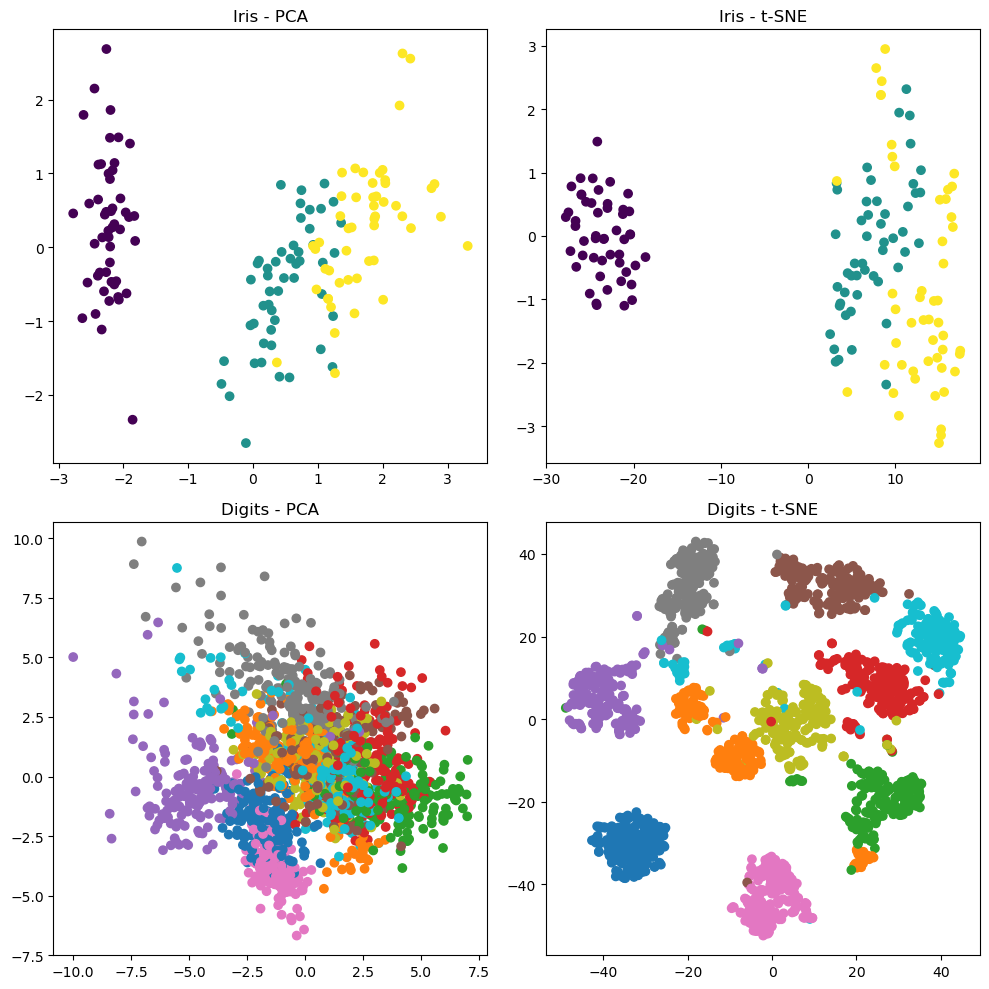

In [6]:
# Enter your code for Checkpoint 1 here

# Dimension Reduction: PCA vs. t-SNE
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Load datasets
# The Iris dataset is a classic for classification with 4 features and 3 classes
# The Digits dataset is a collection of handwritten digits with 64 features and 10 classes
iris = datasets.load_iris()
digits = datasets.load_digits()

# Standardize features
# Scaling the data is a crucial preprocessing step for many machine learning algorithms,
# including PCA and t-SNE, as it ensures all features contribute equally to the distance calculation.
iris_scaled = StandardScaler().fit_transform(iris.data)
digits_scaled = StandardScaler().fit_transform(digits.data)

# PCA: reduce to 2D
# Applying PCA to reduce the data from its original high-dimensional space to a 2D space
# for visualization. PCA is good at capturing global structures.
iris_pca = PCA(n_components=2).fit_transform(iris_scaled)
digits_pca = PCA(n_components=2).fit_transform(digits_scaled)

# t-SNE: reduce to 2D
# t-SNE is used here to reduce the dimensionality to 2D, which is especially effective
# for visualizing clusters in high-dimensional data, as it preserves local neighborhoods.
iris_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(iris_scaled)
digits_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(digits_scaled)

# Visualize all four results in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iris PCA
# Plot the 2D PCA results for the Iris dataset. The points are colored based on their true class.
axes[0,0].scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target, cmap='viridis')
axes[0,0].set_title("Iris - PCA")

# Iris t-SNE
# Plot the 2D t-SNE results for the Iris dataset. Note how the clusters are often more distinct
# than in the PCA plot.
axes[0,1].scatter(iris_tsne[:,0], iris_tsne[:,1], c=iris.target, cmap='viridis')
axes[0,1].set_title("Iris - t-SNE")

# Digits PCA
# Plot the 2D PCA results for the Digits dataset. The colors correspond to the digit's class.
axes[1,0].scatter(digits_pca[:,0], digits_pca[:,1], c=digits.target, cmap='tab10')
axes[1,0].set_title("Digits - PCA")

# Digits t-SNE
# Plot the 2D t-SNE results for the Digits dataset, showing much clearer separation between
# the digit clusters compared to PCA.
axes[1,1].scatter(digits_tsne[:,0], digits_tsne[:,1], c=digits.target, cmap='tab10')
axes[1,1].set_title("Digits - t-SNE")

# Adjusts subplot parameters for a tight layout
plt.tight_layout()

# Display the plot
plt.show()

### Checkpoint 2 - K-means Clustering

Use the following function to generate a dataset containing <code>n_distr</code> 2D points. These points are created by randomly sampling from one of four Gaussian distributions, with the <code>mu</code> value defining how spread out these distributions are:

```python
import numpy as np
from scipy.stats import multivariate_normal

def generate_cluster_data_points(n_distr, mu):
    X0 = np.random.multivariate_normal(np.array([mu, mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X1 = np.random.multivariate_normal(np.array([-mu, mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X2 = np.random.multivariate_normal(np.array([mu, -mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X3 = np.random.multivariate_normal(np.array([-mu, -mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    return np.concatenate((X0, X1, X2, X3))
```

For example, the following four scatter plots show the distribution of <code>n_distr = 4000</code> points (1000 per distribution) for <code>mu</code> values of 0, 1, 2 and 3:

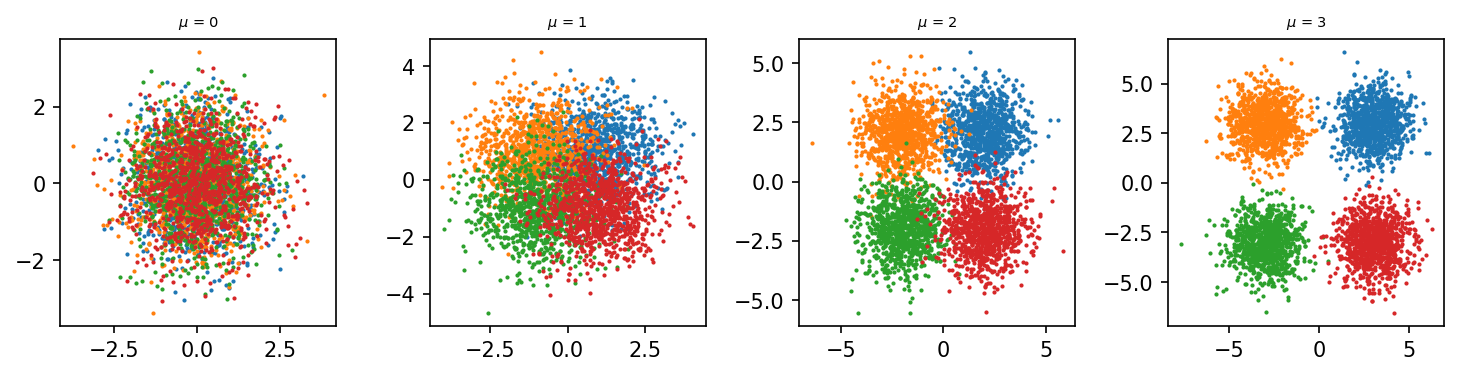

Call this function to generate the four datasets similar to those shown above (n_distr = 4000 and mu = {0, 1, 2, 3})

Create K-means clustering models for each of these four dataset, with K = 2,3,...,10 clusters.

Determine the optimal number of clusters for each dataset based on the silhouette coefficient, and describe how you would interpret these values?

mu=0 → Best k=3, silhouette=0.329
mu=1 → Best k=3, silhouette=0.352
mu=2 → Best k=4, silhouette=0.522
mu=3 → Best k=4, silhouette=0.677


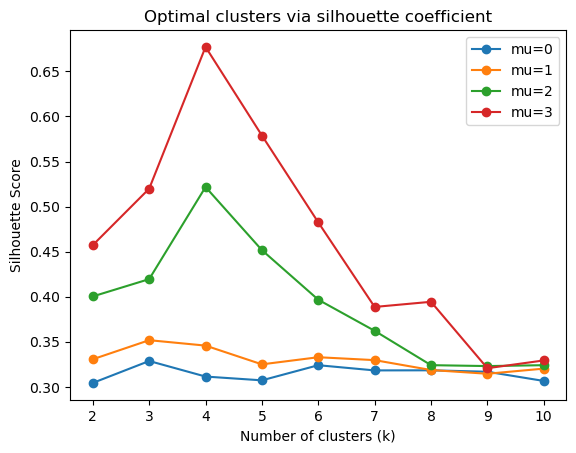

In [8]:
# Enter your code for Checkpoint 2 here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to generate datasets
def generate_cluster_data_points(n_distr, mu):
    X0 = np.random.multivariate_normal(np.array([mu, mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X1 = np.random.multivariate_normal(np.array([-mu, mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X2 = np.random.multivariate_normal(np.array([mu, -mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    X3 = np.random.multivariate_normal(np.array([-mu, -mu]), np.array([[1, 0], [0, 1]]), int(n_distr/4))
    return np.concatenate((X0, X1, X2, X3))

n_distr = 4000
mu_values = [0, 1, 2, 3]

for mu in mu_values:
    X = generate_cluster_data_points(n_distr, mu)
    
    best_score = -1
    best_k = None
    scores = []
    
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        sil = silhouette_score(X, labels)
        scores.append(sil)
        if sil > best_score:
            best_score = sil
            best_k = k
    
    print(f"mu={mu} → Best k={best_k}, silhouette={best_score:.3f}")
    
    # Plot silhouette scores for each dataset
    plt.plot(range(2, 11), scores, marker='o', label=f"mu={mu}")

plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Optimal clusters via silhouette coefficient")
plt.legend()
plt.show()



### Checkpoint 3 - Hierarchical Clustering

Train four agglomerative (hierarchical) clustering models on the Iris dataset, for the min (single), max (complete), average, and Ward linkage criterion. Note, you need to standardise the feature values before applying hierarchical clustering.

Visualise the dendrogram for each trained model by calling the following function:

```python
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model):
    fig, ax = plt.subplots(figsize=(14, 8))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix)
```

In your opinion, which linkage criterion has produced "healthier" clusters?

In [3]:
# Enter your code for Checkpoint 3 here

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Load and standardise Iris dataset
iris = datasets.load_iris()
X = StandardScaler().fit_transform(iris.data)

# Provided dendrogram plotting function
def plot_dendrogram(model, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, ax=ax)
    ax.set_title(title)


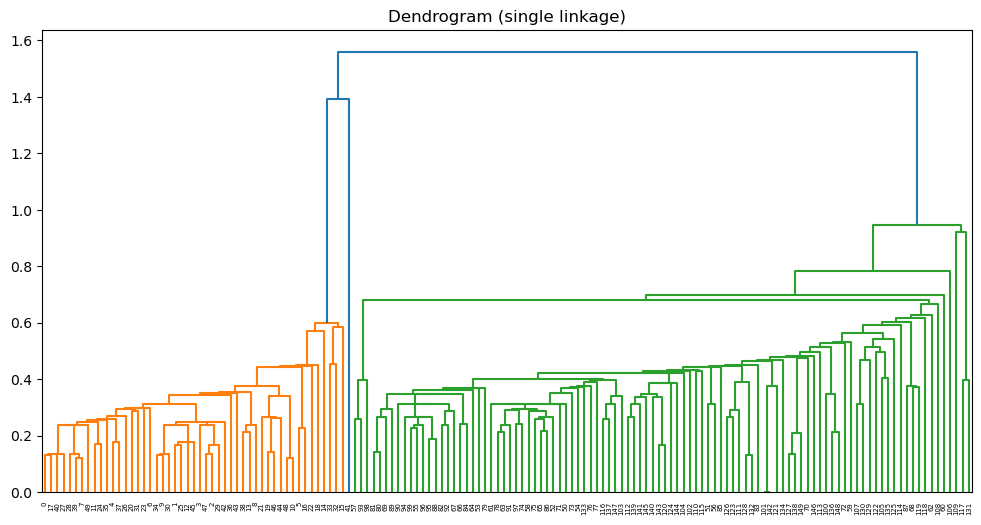

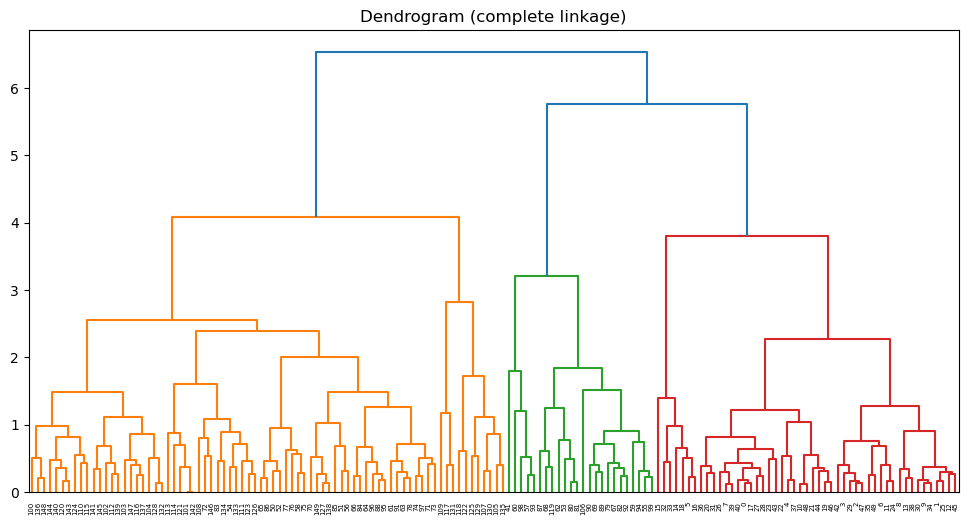

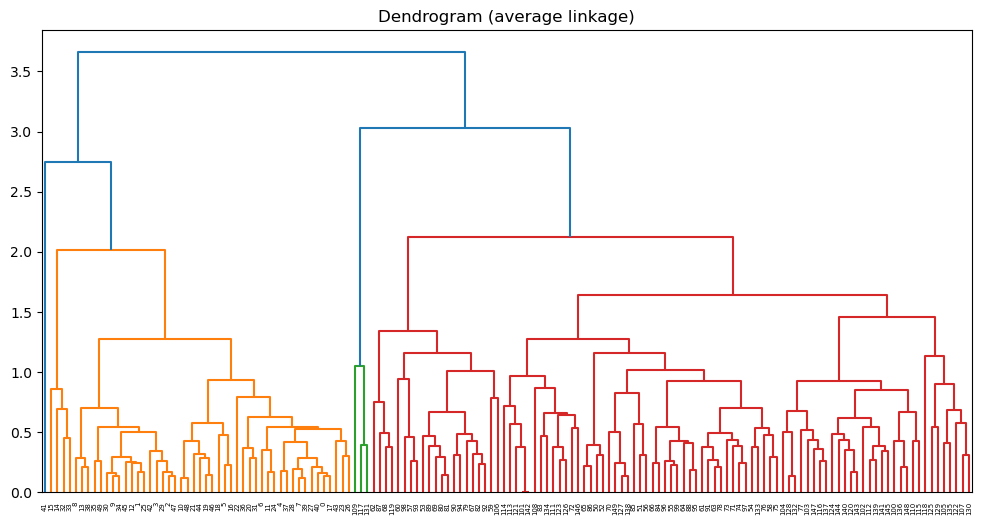

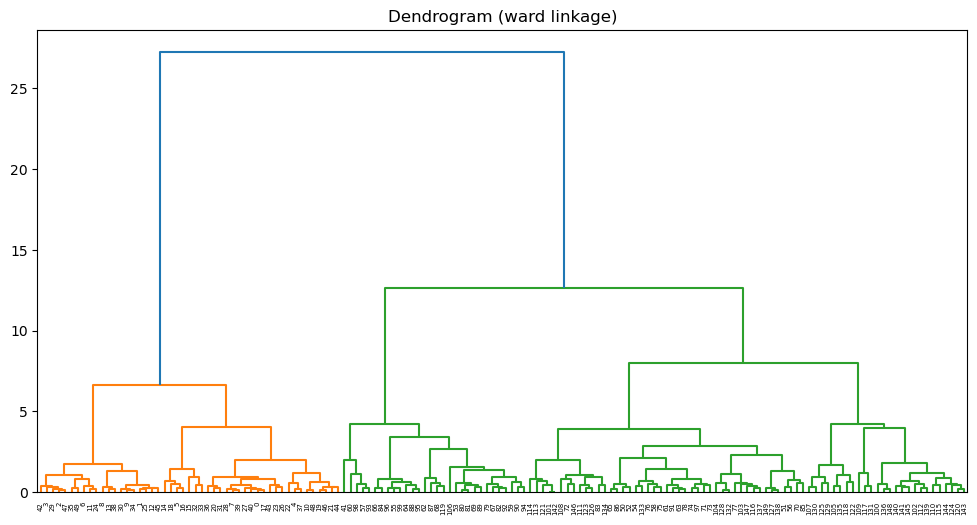

In [4]:
# Try four linkage criteria
linkages = ["single", "complete", "average", "ward"]

for link in linkages:
    model = AgglomerativeClustering(
        n_clusters=None,         # Build the full tree
        distance_threshold=0,    # Needed to plot dendrogram
        linkage=link
    ).fit(X)

    plot_dendrogram(model, f"Dendrogram ({link} linkage)")


plt.show()

In [5]:
from sklearn.metrics import silhouette_score

linkages = ["single", "complete", "average", "ward"]

for link in linkages:
    model = AgglomerativeClustering(n_clusters=4, linkage=link)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"{link.capitalize()} linkage: silhouette score = {score:.3f}")


Single linkage: silhouette score = 0.407
Complete linkage: silhouette score = 0.411
Average linkage: silhouette score = 0.407
Ward linkage: silhouette score = 0.401
